In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.preprocessing import LabelEncoder
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
import requests
import io

In [2]:
df = pd.read_csv("C:\\Sample Data\Recidivism_Challenge_django1.csv")

In [3]:
df = df.dropna()
df.isna().any()

ID                                          False
Gender                                      False
Race                                        False
Age_at_Release                              False
Gang_Affiliated                             False
Supervision_Risk_Score_First                False
Supervision_Level_First                     False
Education_Level                             False
Dependents                                  False
Prison_Offense                              False
Prison_Years                                False
Prior_Arrest_Episodes_Felony                False
Prior_Arrest_Episodes_Misd                  False
Prior_Arrest_Episodes_Violent               False
Prior_Arrest_Episodes_Property              False
Prior_Arrest_Episodes_Drug                  False
Prior_Arrest_Episodes_PPViolationCharges    False
Prior_Conviction_Episodes_Prop              False
Prior_Conviction_Episodes_Drug              False
Delinquency_Reports                         False


In [4]:
df.head()

,ID,Gender,Race,Age_at_Release,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,...,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years
0,9345,M,BLACK,50,False,6,Specialized,At least some college,3,Violent/Non-Sex,...,0,28.333333,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,False,0
2,25971,M,BLACK,30,False,10,Standard,At least some college,0,Property,...,0,7.880000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,False,1
4,17084,M,BLACK,55,False,1,Standard,High School Diploma,2,Violent/Non-Sex,...,1,10.422222,0.066667,0.066667,0.000000,0.000000,1.0,0.778785,False,1
5,18017,M,BLACK,36,True,10,Specialized,High School Diploma,2,Violent/Non-Sex,...,1,10.071429,0.214286,0.000000,0.000000,0.000000,0.0,0.000000,False,1
6,19240,M,BLACK,58,False,10,Specialized,High School Diploma,0,Violent/Non-Sex,...,0,82.857143,0.142857,0.000000,0.071429,0.071429,0.0,0.000000,False,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11306 entries, 0 to 14689
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        11306 non-null  int64  
 1   Gender                                    11306 non-null  object 
 2   Race                                      11306 non-null  object 
 3   Age_at_Release                            11306 non-null  int64  
 4   Gang_Affiliated                           11306 non-null  bool   
 5   Supervision_Risk_Score_First              11306 non-null  int64  
 6   Supervision_Level_First                   11306 non-null  object 
 7   Education_Level                           11306 non-null  object 
 8   Dependents                                11306 non-null  int64  
 9   Prison_Offense                            11306 non-null  object 
 10  Prison_Years                      

In [6]:
df = df.drop('ID', axis = 1)

In [7]:
Counter(df['Recidivism_Within_3years'])
#Counter(df['Recidivism_Within_3years'])[1]/df['Recidivism_Within_3years'].size

Counter({0: 4554, 1: 6752})

In [8]:
pre_y = df['Recidivism_Within_3years']
pre_X = df.drop('Recidivism_Within_3years', axis = 1)

In [9]:
Counter(pre_y)

Counter({0: 4554, 1: 6752})

In [10]:
object_cols = [col for col in pre_X.columns if pre_X[col].dtype == 'object' or pre_X[col].dtype == 'bool']

for col in object_cols:
    le = LabelEncoder()
    le.fit(pre_X[col])
    pre_X[col] = le.transform(pre_X[col])

In [11]:
smote = SMOTE(sampling_strategy = 'minority')
X1, y = smote.fit_resample(pre_X, pre_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [12]:
Counter(y)

Counter({0: 6752, 1: 6752})

In [13]:
X_train, X_test, y_train, y_test = train_test_split(pre_X, pre_y, test_size = 0.2, random_state = 42, shuffle = True)

In [14]:
classifier = Sequential()
classifier.add(Dense(400, activation = 'relu', kernel_initializer = 'random_normal', input_dim = 30))
classifier.add(Dense(800, activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(Dense(10, activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 20, epochs = 50)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

Epoch 1/50
453/453 [==============================] - 2s 4ms/step - loss: 0.6664 - accuracy: 0.5959
Epoch 2/50
453/453 [==============================] - 2s 4ms/step - loss: 0.6385 - accuracy: 0.6087
Epoch 3/50
453/453 [==============================] - 2s 3ms/step - loss: 0.6193 - accuracy: 0.6663
Epoch 4/50
453/453 [==============================] - 2s 3ms/step - loss: 0.6065 - accuracy: 0.6784
Epoch 5/50
453/453 [==============================] - 2s 3ms/step - loss: 0.6014 - accuracy: 0.6863
Epoch 6/50
453/453 [==============================] - 2s 3ms/step - loss: 0.5876 - accuracy: 0.6910
Epoch 7/50
453/453 [==============================] - 2s 4ms/step - loss: 0.5806 - accuracy: 0.6975
Epoch 8/50
453/453 [==============================] - 2s 4ms/step - loss: 0.5757 - accuracy: 0.6981
Epoch 9/50
453/453 [==============================] - 2s 4ms/step - loss: 0.5721 - accuracy: 0.7036
Epoch 10/50
453/453 [==============================] - 2s 4ms/step - loss: 0.5708 - accuracy: 0.6989

[0.41281020641326904, 0.804843008518219]

In [15]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.62)
y_pred

71/71 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

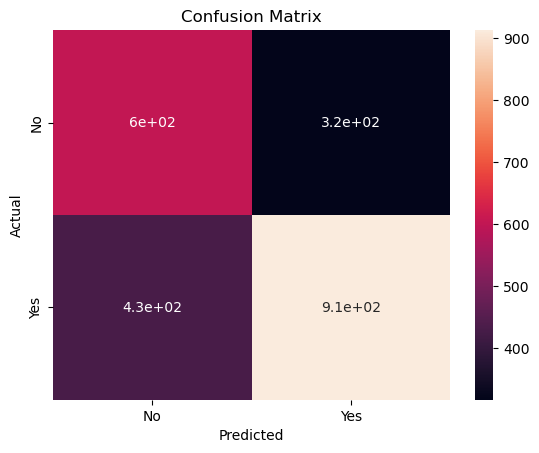

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

In [17]:
import pickle
import joblib
filename = 'recidivism_model.pkl'
joblib.dump(classifier, filename)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-02 15:58:26         2362
metadata.json                                  2023-05-02 15:58:26           64
variables.h5                                   2023-05-02 15:58:26      4120320


['recidivism_model.pkl']